In [1]:
!pip install requests
!pip install tabulate
!pip install future
!pip install matplotlib

In [2]:
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

^C
^C


In [2]:
import h2o
from h2o.automl import H2OAutoML
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('data_custom_train.csv')
df_test = pd.read_csv("data_custom_test.csv")

In [7]:
h2o.init()
dataframe_train = h2o.H2OFrame(df)
dataframe_test = h2o.H2OFrame(df_test)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 20.0.1+9-29, mixed mode, sharing)
  Starting server from C:\Users\sinaa\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\sinaa\AppData\Local\Temp\tmpv46w9k1y
  JVM stdout: C:\Users\sinaa\AppData\Local\Temp\tmpv46w9k1y\h2o_sinaa_started_from_python.out
  JVM stderr: C:\Users\sinaa\AppData\Local\Temp\tmpv46w9k1y\h2o_sinaa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_sinaa_j68srf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.955 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
y = "density_percent"
x = dataframe_train.columns
x.remove(y)

In [9]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=x,y=y, training_frame=dataframe_train)

AutoML progress: |
20:11:44.967: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20230720_201144


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    189                189                         101296                 6            6            6             15            63            37.8889

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 5.989760381304165e-07
RMSE: 0.0007739354224548818
MAE: 0.0005507187843322754
RMSLE: 0.0004505157927699119
Mean Residual Deviance: 5.989760381304165e-07

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 3.5562379305165974e-06
RMSE: 0.001885799016469305
MAE: 0.001315936087181327
RMSLE: 0.0011033183439993928
Mean Residual Deviance: 3.5562379305165974e-06

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.00131594   0.000115025  0.00127429    0.00131082    0.00149048    0.00133119    0.00117289
mean_residual_deviance  3.55624e-06  7.29001e-07  2.77703e-06   3.80509e-06   4.62712e-06   3.57216e-06   2.9998e-06
mse                     3.55624e-06  7.29001e-07  2.77703e-06   3.80509e-06   4.62712e-06   3.57216e-06   2.9998e-06
r2                      0.9999       2.26402e-05  0.999923      0.999901      0.999864      0.999898      0.999915
residual_deviance       3.55624e-06  7.29001e-07  2.77703e-06   3.80509e-06   4.62712e-06   3.57216e-06   2.9998e-06
rmse                    0.00187804   0.000191095  0.00166644    0.00195066    0.00215107    0.00189002    0.00173199
rmsle                   0.00109807   0.000120187  0.000983229   0.00113303    0.001281      0.00109449    0.000998603

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse          training_mae           training_deviance
---  -------------------  ----------  -----------------  ---------------------  ---------------------  ----------------------
     2023-07-20 20:13:04  6.859 sec   0.0                0.18957864582643102    0.15431935166424796    0.035940062953383374
     2023-07-20 20:13:04  6.930 sec   5.0                0.12336394049220253    0.09899516940116883    0.015218661813763688
     2023-07-20 20:13:04  7.002 sec   10.0               0.08089589529249462    0.06398744575182597    0.006544145875174253
     2023-07-20 20:13:04  7.104 sec   15.0               0.055275224768179865   0.04397642842928569    0.003055350473172805
     2023-07-20 20:13:04  7.170 sec   20.0               0.03901828658216729    0.030889154672622682   0.0015224266878081363
     2023-07-20 20:13:04  7.267 sec   25.0               0.02857090102558959    0.02254893124103546    0.0008162963854140362
     2023-07-20 20:13:04  7.333 sec   30.0               0.02152011310147618    0.017017138799031575   0.0004631152679003267
     2023-07-20 20:13:04  7.396 sec   35.0               0.017318263982655138   0.013651757637659708   0.0002999222673729302
     2023-07-20 20:13:04  7.483 sec   40.0               0.01369246566168452    0.010688804109891255   0.00018748361589640973
     2023-07-20 20:13:05  7.605 sec   45.0               0.01179399790420542    0.009093345522880554   0.00013909838656440184
---  ---                  ---         ---                ---                    ---                    ---
     2023-07-20 20:13:06  8.644 sec   145.0              0.0016917177844122779  0.0011984750231107076  2.8619090620967863e-06
     2023-07-20 20:13:06  8.696 sec   150.0              0.0015505296324155413  0.0010958003401756286  2.40414214

In [10]:
lb = aml.leaderboard
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_5_AutoML_1_20230720_201144,0.0018858,3.55624e-06,0.00131594,0.00110332,3.55624e-06
StackedEnsemble_AllModels_3_AutoML_1_20230720_201144,0.00194778,3.79384e-06,0.001389,0.0011446,3.79384e-06
StackedEnsemble_AllModels_2_AutoML_1_20230720_201144,0.00195184,3.8097e-06,0.00139409,0.00114771,3.8097e-06
StackedEnsemble_BestOfFamily_3_AutoML_1_20230720_201144,0.00203536,4.14271e-06,0.00150064,0.00120401,4.14271e-06
GBM_4_AutoML_1_20230720_201144,0.00348569,1.215e-05,0.00122758,0.00211437,1.215e-05
StackedEnsemble_AllModels_1_AutoML_1_20230720_201144,0.00353702,1.25105e-05,0.00135474,0.00214894,1.25105e-05
StackedEnsemble_BestOfFamily_2_AutoML_1_20230720_201144,0.00358494,1.28518e-05,0.00148141,0.00218277,1.28518e-05
GBM_2_AutoML_1_20230720_201144,0.00377444,1.42464e-05,0.00194652,0.00226997,1.42464e-05
GBM_3_AutoML_1_20230720_201144,0.00379631,1.4412e-05,0.00154505,0.00230505,1.4412e-05
GBM_grid_1_AutoML_1_20230720_201144_model_1,0.00420907,1.77163e-05,0.00151529,0.00255309,1.77163e-05


In [11]:
performance = aml.leader.model_performance(dataframe_test)
print(performance)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.01248742106798796
RMSE: 0.11174713002125808
MAE: 0.07129713882813302
RMSLE: 0.06858560555989485
Mean Residual Deviance: 0.01248742106798796


In [13]:
pred = aml.predict(dataframe_test)
pred.head()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
0.867514
0.970317
0.576871
0.994391
0.806644
0.545734
0.529158
0.895741
0.994391
0.89363


In [19]:
import matplotlib.pyplot as plt

test_df = dataframe_test.as_data_frame()
pred_df = pred.as_data_frame()

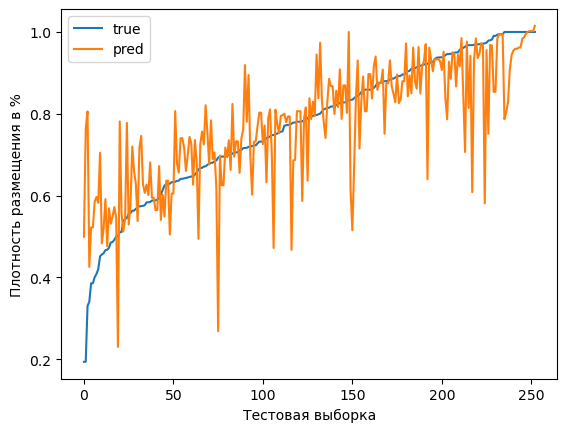

In [25]:
y_df_test, pred = zip(*sorted(zip(test_df['density_percent'], pred_df['predict'])))
x = range(len(y_df_test))
plt.plot(x, y_df_test, label="true")
plt.plot(x, pred, label="pred")
plt.ylabel("Плотность размещения в %")
plt.xlabel("Тестовая выборка")
plt.legend()